In [1]:
from numpy import array, dot, linspace, random, sign
from scipy.special import factorial
from math import fabs, sin, cos, pi
import matplotlib.pyplot as plt

In [2]:
random.seed(42)
nb_samples = 50000
ddt = 1e-4

In [3]:
def f0(t):
    return cos(t)

In [4]:
def df0(t,d):
    return cos(t+(d*pi/2))

In [5]:
n = 5

In [6]:
ts = [0] + list(map(lambda x: x , ddt*linspace(1, nb_samples, nb_samples)))

In [7]:
fs = list(map(lambda t: f0(t) + (sin(t/ddt) + random.normal(0, 1))*0.5, ts))
fs0 = list(map(lambda t: f0(t), ts))

In [8]:
z_HOUND = [0 for _ in range(n)]
zLevant = [0 for _ in range(n)]
z_Levant = [0 for _ in range(n)]
zKhalil = [0 for _ in range(n)]
z_Khalil = [0 for _ in range(n)]
z_HOUND[0] = fs[0]
zLevant[0] = fs[0]
zKhalil[0] = fs[0]
zs_HOUND = [[z_HOUND[j]] for j in range(n)]
zsLevant = [[zLevant[j]] for j in range(n)]
zsKhalil = [[zKhalil[j]] for j in range(n)]

es_HOUND = [[] for _ in range(n)]
esLevant = [[] for _ in range(n)]
esKhalil = [[] for _ in range(n)]
aes_HOUND = [[] for _ in range(n)]
aesLevant = [[] for _ in range(n)]
aesKhalil = [[] for _ in range(n)]
ks_HOUND = [[] for _ in range(n)]
ksLevant = [[] for _ in range(n)]
ksKhalil = [[] for _ in range(n)]
ls = []
for j in range(n):
    ls.append(linspace(0, n-1-j, n-j))
    es_HOUND[j].append(z_HOUND[j] - df0(0,j))
    esLevant[j].append(zLevant[j] - df0(0,j))
    esKhalil[j].append(zKhalil[j] - df0(0,j))
    aes_HOUND[j].append(fabs(z_HOUND[j] - df0(0,j)))
    aesLevant[j].append(fabs(zLevant[j] - df0(0,j)))
    aesKhalil[j].append(fabs(zKhalil[j] - df0(0,j)))
    ks_HOUND[j].append(0)
    ksLevant[j].append(0)
    ksKhalil[j].append(0)
    
fctrls = []
for m in range(1,n+1):
    fctrls.append((factorial(n+m-1)/factorial(m)/factorial(n-m))*n)

for i in range(1,len(ts)):
    t = ts[i]
    dt = ddt
    
    eps_HOUND = fs[i] - dot(dt**ls[0], z_HOUND[:] / factorial(ls[0]))
    z__HOUND = [dot(dt**ls[m-1] / factorial(ls[m-1]), z_HOUND[(m-1):]) + (dt*fctrls[m-1]/(t**m))*eps_HOUND for m in range(1,n+1)]
    epsLevant = fs[i] - (zLevant[0] + zLevant[1]*dt + zLevant[2]*dt*dt/2 + zLevant[3]*dt*dt*dt/6 + zLevant[4]*dt*dt*dt*dt/24)
    STD_L = 1
    z_Levant[0] = zLevant[0] +    5*(STD_L**(1/5))*sign(epsLevant)*(fabs(epsLevant)**(4/5))*dt + zLevant[1]*dt + zLevant[2]*dt*dt/2 + zLevant[3]*dt*dt*dt/6 + zLevant[4]*dt*dt*dt*dt/24
    z_Levant[1] = zLevant[1] +10.03*(STD_L**(2/5))*sign(epsLevant)*(fabs(epsLevant)**(3/5))*dt + zLevant[2]*dt + zLevant[3]*dt*dt/2 + zLevant[4]*dt*dt*dt/6
    z_Levant[2] = zLevant[2] + 9.30*(STD_L**(3/5))*sign(epsLevant)*(fabs(epsLevant)**(2/5))*dt + zLevant[3]*dt + zLevant[4]*dt*dt/2
    z_Levant[3] = zLevant[3] + 4.57*(STD_L**(4/5))*sign(epsLevant)*(fabs(epsLevant)**(1/5))*dt + zLevant[4]*dt
    z_Levant[4] = zLevant[4] +  1.1*(STD_L**(5/5))*sign(epsLevant)*(fabs(epsLevant)**(0/5))*dt
    epsKhalil = fs[i] - dot(dt**ls[0], zKhalil[:] / factorial(ls[0]))
    HGD_L = 1
    z_Khalil[0] = zKhalil[0] + (    5*(HGD_L**1))*epsKhalil*dt + zKhalil[1]*dt + zKhalil[2]*dt*dt/2 + zKhalil[3]*dt*dt*dt/6 + zKhalil[4]*dt*dt*dt*dt/24
    z_Khalil[1] = zKhalil[1] + (10.03*(HGD_L**2))*epsKhalil*dt + zKhalil[2]*dt + zKhalil[3]*dt*dt/2 + zKhalil[4]*dt*dt*dt/6
    z_Khalil[2] = zKhalil[2] + ( 9.30*(HGD_L**3))*epsKhalil*dt + zKhalil[3]*dt + zKhalil[4]*dt*dt/2
    z_Khalil[3] = zKhalil[3] + ( 4.57*(HGD_L**4))*epsKhalil*dt + zKhalil[4]*dt
    z_Khalil[4] = zKhalil[4] + (  1.1*(HGD_L**5))*epsKhalil*dt
    k__HOUND = [dot((0-t)**ls[j] / factorial(ls[j]), z__HOUND[j:]) / factorial(j) for j in range(n)]
    k_Levant = [dot((0-t)**ls[j] / factorial(ls[j]), z_Levant[j:]) / factorial(j) for j in range(n)]
    k_Khalil = [dot((0-t)**ls[j] / factorial(ls[j]), z_Khalil[j:]) / factorial(j) for j in range(n)]
    for j in range(n):
        z_HOUND[j] = z__HOUND[j]
        zLevant[j] = z_Levant[j]
        zKhalil[j] = z_Khalil[j]
        zs_HOUND[j].append(z_HOUND[j])
        zsLevant[j].append(zLevant[j])
        zsKhalil[j].append(zKhalil[j])
        es_HOUND[j].append(z_HOUND[j] - df0(t,j))
        esLevant[j].append(zLevant[j] - df0(t,j))
        esKhalil[j].append(zKhalil[j] - df0(t,j))
        aes_HOUND[j].append(fabs(es_HOUND[j][-1:][0]))
        aesLevant[j].append(fabs(esLevant[j][-1:][0]))
        aesKhalil[j].append(fabs(esKhalil[j][-1:][0]))
        ks_HOUND[j].append(k__HOUND[j])
        ksLevant[j].append(k_Levant[j])
        ksKhalil[j].append(k_Khalil[j])

interp_HOUND = []
interpLevant = []
interpKhalil = []
t = ts[-1]
for i in range(len(ts)):
    tau = ts[i]
    interp_HOUND.append(dot((tau - t)**ls[0] / factorial(ls[0]), z_HOUND[:]))
    interpLevant.append(dot((tau - t)**ls[0] / factorial(ls[0]), zLevant[:]))
    interpKhalil.append(dot((tau - t)**ls[0] / factorial(ls[0]), zKhalil[:]))

extra_prev_ts = []
extra_prev_f0 = []
extra_prev_z0_HOUND = []
extra_prev_z0Levant = []
extra_prev_z0Khalil = []
for tau in range(-int(1/ddt),0):
    extra_prev_ts.append(tau*ddt)
    extra_prev_f0.append(f0(tau*ddt))
    extra_prev_z0_HOUND.append(dot(((tau*ddt) - t)**ls[0] / factorial(ls[0]), z_HOUND[:]))
    extra_prev_z0Levant.append(dot(((tau*ddt) - t)**ls[0] / factorial(ls[0]), zLevant[:]))
    extra_prev_z0Khalil.append(dot(((tau*ddt) - t)**ls[0] / factorial(ls[0]), zKhalil[:]))

extra_post_ts = []
extra_post_f0 = []
extra_post_z0_HOUND = []
extra_post_z0Levant = []
extra_post_z0Khalil = []
for tau in range(0,int(1/ddt)):
    extra_post_ts.append(t+(tau*ddt))
    extra_post_f0.append(f0(t+(tau*ddt)))
    extra_post_z0_HOUND.append(dot((tau*ddt)**ls[0] / factorial(ls[0]), z_HOUND[:]))
    extra_post_z0Levant.append(dot((tau*ddt)**ls[0] / factorial(ls[0]), zLevant[:]))
    extra_post_z0Khalil.append(dot((tau*ddt)**ls[0] / factorial(ls[0]), zKhalil[:]))

#print("f0[20000]",5-0.004*20000+0.0003*20000*20000-0.00002*20000*20000*20000+0.000001*20000*20000*20000*20000);
print("z_HOUND=",z_HOUND)
print("zKhalil=",zKhalil)
print("zLevant=",zLevant)
    
for j in range(n):
    print("K^",j," HOUND=", ks_HOUND[j][-1])
    print("K^",j,"Khalil=", ksKhalil[j][-1])
    print("K^",j,"Levant=", ksLevant[j][-1])

z_HOUND= [0.34757556372277604, 1.2459975865704644, 0.22505551004637359, -0.781104331373854, -0.46561387200516996]
zKhalil= [0.4163827095113287, 1.7148490850622546, 1.405098102866949, 0.5112891767384536, 0.07786932207298002]
zLevant= [0.42152095173100923, 1.7369409194061198, 1.444685554709448, 0.5338546163030586, 0.07919999999999947]
K^ 0  HOUND= 1.0784271599374478
K^ 0 Khalil= 0.7818526503029863
K^ 0 Levant= 0.73591461558811
K^ 1  HOUND= 0.057204894273128915
K^ 1 Khalil= -0.5418042632289028
K^ 1 Levant= -0.46330415035287587
K^ 2  HOUND= -0.8447981165744904
K^ 2 Khalil= -0.08899062745653463
K^ 2 Levant= -0.11729376340292597
K^ 3  HOUND= 0.2578275047753326
K^ 3 Khalil= 0.020323761062258926
K^ 3 Levant= 0.022975769383843547
K^ 4  HOUND= -0.019400578000215416
K^ 4 Khalil= 0.0032445550863741675
K^ 4 Levant= 0.003299999999999978


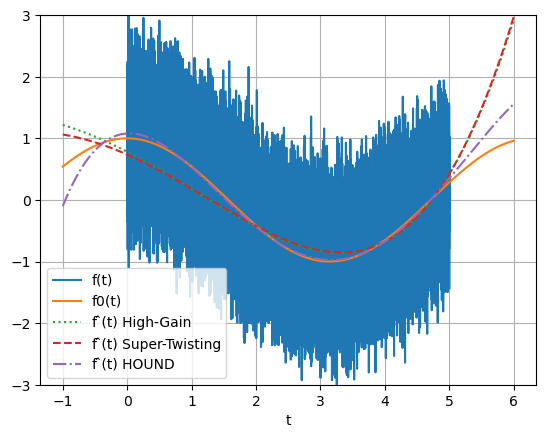

In [26]:
fig, ax = plt.subplots()#figsize=(14, 8))
ax.set_ylim(-3, 3)
x = 1
ax.plot(ts, fs, label='f(t)')
ax.plot(extra_prev_ts + ts+extra_post_ts[1:], extra_prev_f0 + fs0 + extra_post_f0[1:], label='f0(t)', linestyle="solid")
ax.plot(extra_prev_ts + ts+extra_post_ts[1:], extra_prev_z0Khalil + interpKhalil[1:] + extra_post_z0Khalil, label='f ̂(t) High-Gain', linestyle="dotted")
ax.plot(extra_prev_ts + ts+extra_post_ts[1:], extra_prev_z0Levant + interpLevant[1:] + extra_post_z0Levant, label='f ̂(t) Super-Twisting', linestyle="dashed")
ax.plot(extra_prev_ts + ts+extra_post_ts[1:], extra_prev_z0_HOUND + interp_HOUND[1:] + extra_post_z0_HOUND, label='f ̂(t) HOUND', linestyle="dashdot")
ax.set_xlabel("t")
ax.grid();
plt.legend()
plt.show();

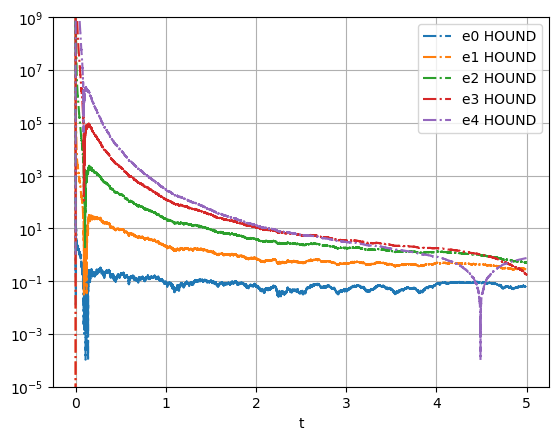

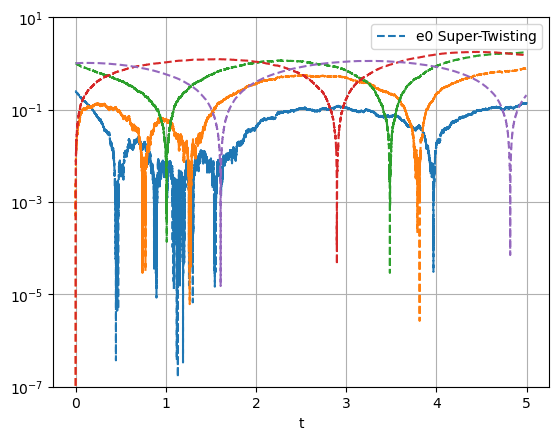

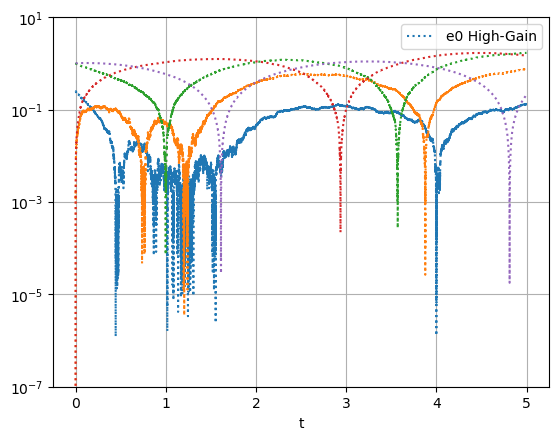

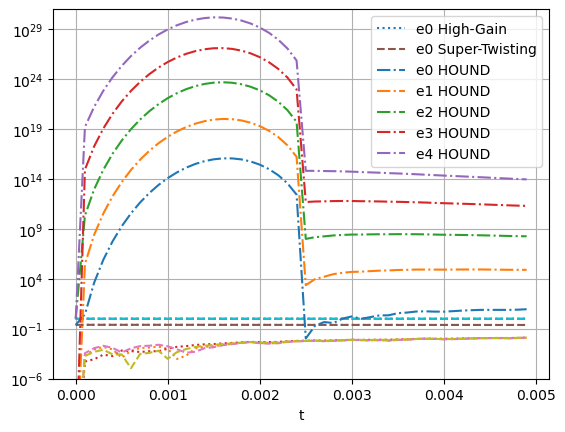

In [21]:
fig, ax = plt.subplots()
ax.set_ylim(1e-5, 1e9)
for j in range(n):
    ax.plot(ts, aes_HOUND[j], label='e'+str(j)+' HOUND', linestyle="dashdot")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(1e-7, 1e1)
ax.plot(ts, aesLevant[0], label='e'+str(0)+' Super-Twisting', linestyle="dashed")
for j in range(1,n):
    ax.plot(ts, aesLevant[j], linestyle="dashed")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(1e-7, 1e1)
ax.plot(ts, aesKhalil[0], label='e'+str(0)+' High-Gain', linestyle="dotted")
for j in range(1,n):
    ax.plot(ts, aesKhalil[j], linestyle="dotted")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();

fig, ax = plt.subplots()
ax.set_ylim(1e-6, 1e31)
ax.plot(ts[:50], aesKhalil[0][:50], label='e'+str(0)+' High-Gain', linestyle="dotted")
for j in range(1,n):
    ax.plot(ts[:50], aesKhalil[j][:50], linestyle="dotted")
ax.plot(ts[:50], aesLevant[0][:50], label='e'+str(0)+' Super-Twisting', linestyle="dashed")
for j in range(1,n):
    ax.plot(ts[:50], aesLevant[j][:50], linestyle="dashed")
for j in range(n):
    ax.plot(ts[:50], aes_HOUND[j][:50], label='e'+str(j)+' HOUND', linestyle="dashdot")
ax.grid();
ax.set_xlabel("t")
ax.set_yscale('log')
plt.legend()
plt.show();

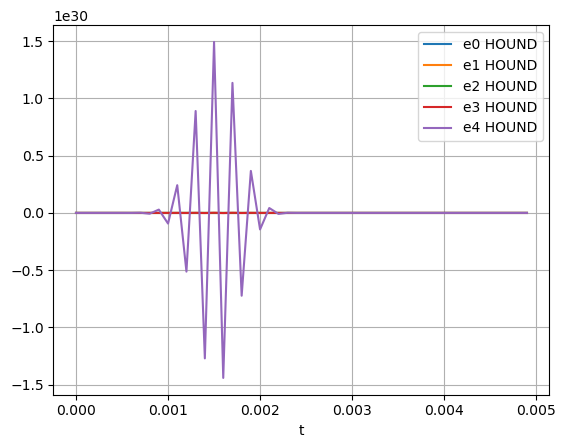

In [11]:
fig, ax = plt.subplots()
for j in range(n):
    ax.plot(ts[:50], es_HOUND[j][:50], label='e'+str(j)+' HOUND')
ax.grid();
ax.set_xlabel("t")
plt.legend()
plt.show();